In [1]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/mart/mart.csv")
df.head()

,seoul,incheon,gyungi,male,female,age10,age2030,age4050,age60,food,...,product,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn,amount,class
0,1,0,0,0,1,1,0,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,7,0
1,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,655,1
2,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,282,1
3,1,0,0,0,1,0,1,0,0,0,...,1,4.0,3.5,-3.3,1.2,73,1.6,0.0,35,0
4,1,0,0,0,1,0,1,0,0,0,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,183,1


In [2]:
train_cols = df.columns[0:-2]
X = df[train_cols]
y = df["class"]

In [3]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['class'])
df_samp = pd.concat([X_samp,y_samp],axis=1)

X = df_samp[train_cols]
y = df_samp["class"]

In [4]:
import statsmodels.api as sm

model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

         Current function value: 0.281508
         Iterations: 35
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.594    
Dependent Variable:    class             AIC:               9069.2693
Date:                  2021-12-16 15:09  BIC:               9199.8861
No. Observations:      16048             Log-Likelihood:    -4517.6  
Df Model:              16                LL-Null:           -11124.  
Df Residuals:          16031             LLR p-value:       0.0000   
Converged:             0.0000            Scale:             1.0000   
No. Iterations:        35.0000                                       
---------------------------------------------------------------------
         Coef.    Std.Err.     z    P>|z|      [0.025       0.975]   
---------------------------------------------------------------------
seoul   -0.3328         nan     nan    nan           nan          nan
incheon -3.0344         nan     nan    nan          

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)),
])
params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1}
0.7355435231437558


In [6]:
scores = []
scores.append(grid.best_score_)
scores

[0.7355435231437558]

In [7]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6)) # 가지치기 수 3~5일 때 최선은?
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4}
0.7468201993093885


In [8]:
scores.append(grid.best_score_)
scores

[0.7355435231437558, 0.7468201993093885]

In [9]:
tree = grid.best_estimator_['clf']

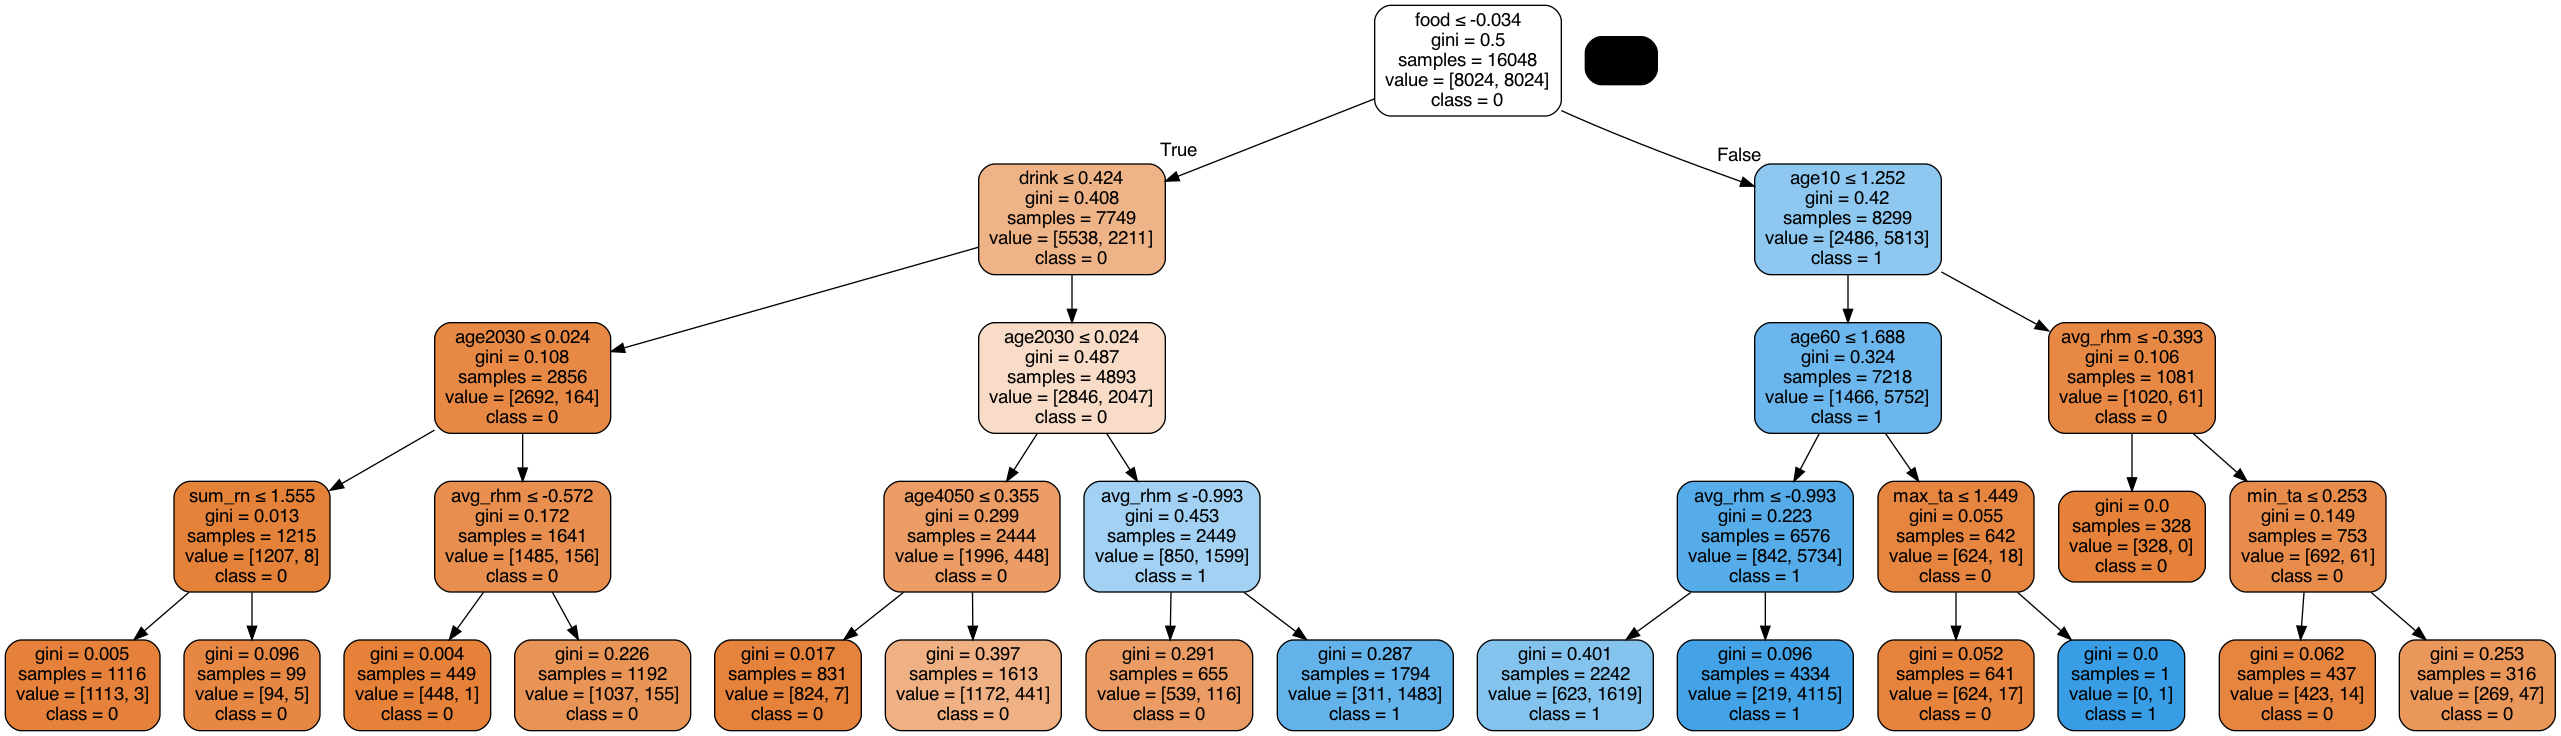

In [10]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=train_cols, class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

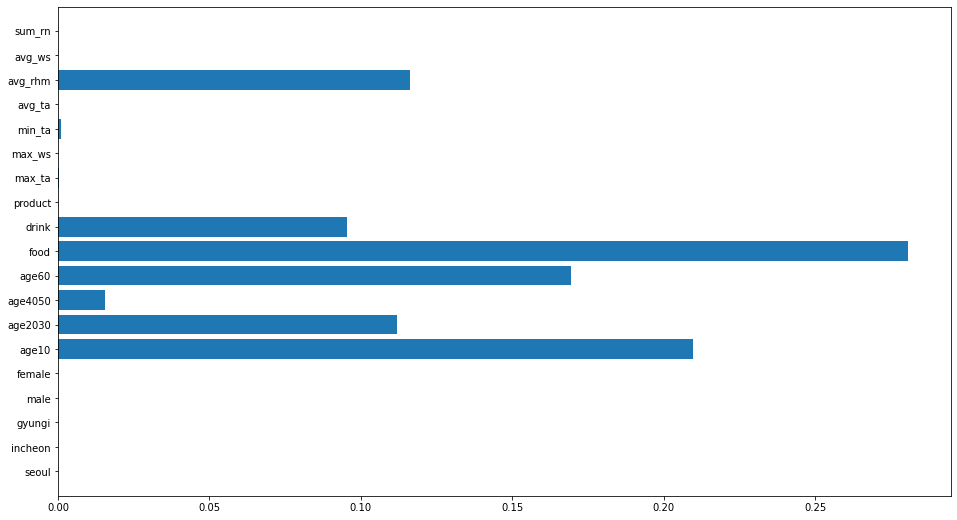

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),train_cols)
    plt.ylim(-1,n_features)

plot_tree(tree)

In [12]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 40}
0.6850649930781602


In [13]:
scores.append(grid.best_score_)
scores

[0.7355435231437558, 0.7468201993093885, 0.6850649930781602]

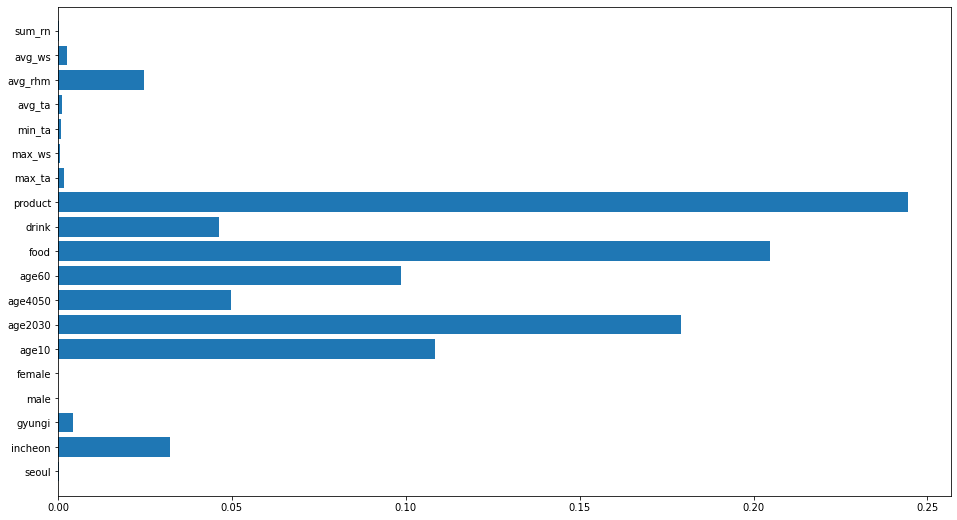

In [14]:
rf = grid.best_estimator_['clf']
plot_tree(rf)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])
params = {
    'clf__n_neighbors': list(range(1,11)) # 이웃 1~10 중에 몇 개 고려해야 최선?
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 10}
0.6089848802786674


In [16]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6089848802786674]

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=1000)),
])
params = {
    'clf__hidden_layer_sizes': [(50,),(100,)]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__hidden_layer_sizes': (50,)}
0.5447420515320358


In [18]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6089848802786674,
 0.5447420515320358]

In [19]:
from sklearn.svm import SVC

pipe = Pipeline([
    ('sclaer', StandardScaler()),
    ('clf', SVC(random_state=0)),
])
params = {
    'clf__C': [0.01, 0.1, 1],
    'clf__gamma': [0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1, 'clf__gamma': 0.01}
0.6886822179473965


In [20]:
scores.append(grid.best_score_)
scores

[0.7355435231437558,
 0.7468201993093885,
 0.6850649930781602,
 0.6089848802786674,
 0.5447420515320358,
 0.6886822179473965]

In [21]:
methods = ["LOGIT", "Tree", "RF", "KNN", "ANN", "SVM"]

scores_arr = np.array(scores)
max_rate = np.max(scores_arr)
idx = np.argmax(scores_arr)

print(methods)
print(scores_arr)
print(methods[idx])
print(max_rate)

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.73554352 0.7468202  0.68506499 0.60898488 0.54474205 0.68868222]
Tree
0.7468201993093885


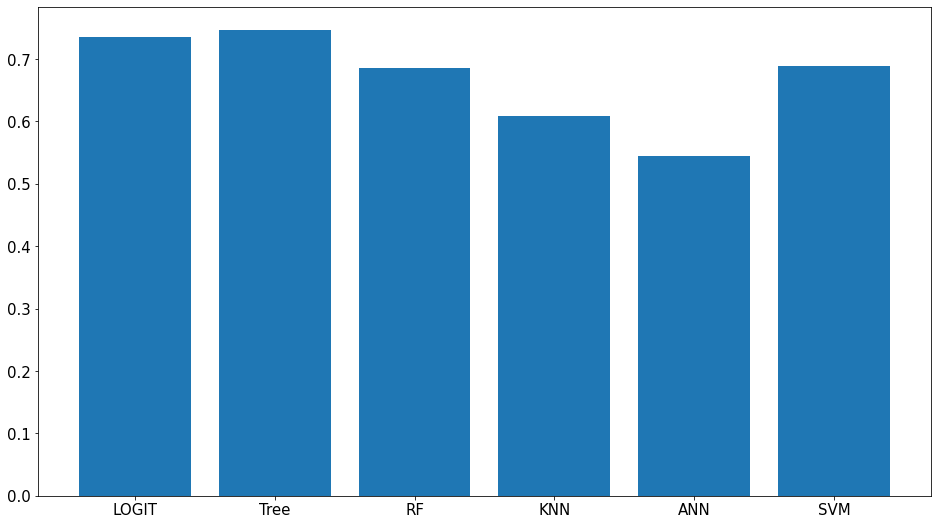

In [22]:
plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.show()